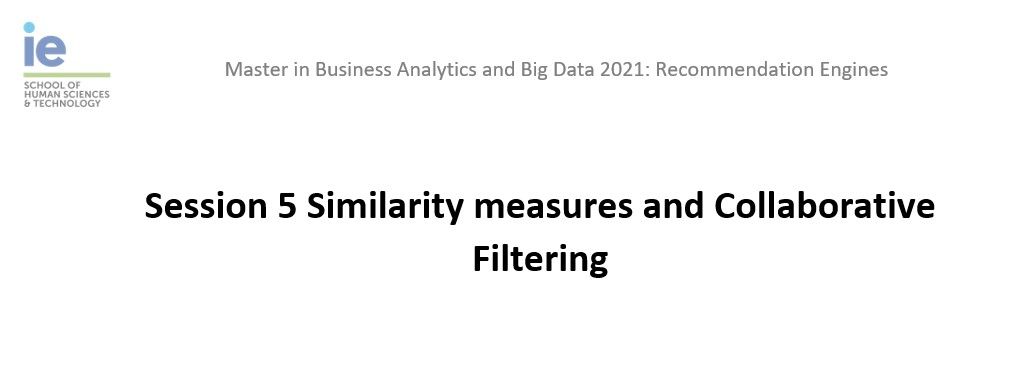

# Similarities 

In our previous session we covered how to measure similarities among users or items. In this section we are going to put that in practice.

In [1]:
import pandas as pd

In [2]:
movielens = pd.read_csv('../data/ratings.csv')
movielens_meta = pd.read_csv('../data/movies.csv')
data = movielens.merge(movielens_meta,on='movieId', how='left')
rat_mat = data.pivot_table(index='userId',columns='title',values='rating')
rat_mat

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


We can select a specific user by using the following:

In [3]:
rat_mat.loc[1]

title
'71 (2014)                                   NaN
'Hellboy': The Seeds of Creation (2004)      NaN
'Round Midnight (1986)                       NaN
'Salem's Lot (2004)                          NaN
'Til There Was You (1997)                    NaN
                                            ... 
eXistenZ (1999)                              NaN
xXx (2002)                                   NaN
xXx: State of the Union (2005)               NaN
¡Three Amigos! (1986)                        4.0
À nous la liberté (Freedom for Us) (1931)    NaN
Name: 1, Length: 9719, dtype: float64

## Exercise
Select two users such as their rating mean and variance are really different. What is the problem you can spot about having such differences? 

In [4]:
#Your code here
#first we add the mean rating and variance rating of each user
mean_ratings = list(rat_mat.mean(axis=1))
variance_ratings = list(rat_mat.var(axis=1))
rat_mat["mean_ratings"] = mean_ratings
rat_mat["variance_ratings"] = variance_ratings
rat_mat

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),mean_ratings,variance_ratings
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.366379,0.640077
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.948276,0.649015
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.435897,4.370783
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.555556,1.727132
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.636364,0.980973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.657399,0.524351
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.786096,0.932494
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN,3.134176,1.164807


In [5]:
# useriD with the higher ratings
rat_mat[rat_mat.mean_ratings == rat_mat.mean_ratings.max()]

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),mean_ratings,variance_ratings
userId,,,,,,,,,,,,,,,,,,,,,
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0


In [6]:
# useriD with the lowest ratings
rat_mat[rat_mat.mean_ratings == rat_mat.mean_ratings.min()]

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),mean_ratings,variance_ratings
userId,,,,,,,,,,,,,,,,,,,,,
442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.275,0.486184


In [7]:
# useriD with the highest variance in ratings
rat_mat[rat_mat.variance_ratings == rat_mat.variance_ratings.max()]

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),mean_ratings,variance_ratings
userId,,,,,,,,,,,,,,,,,,,,,
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.435897,4.370783


In [8]:
# useriD with the lowest variance in ratings
rat_mat[rat_mat.variance_ratings == rat_mat.variance_ratings.min()]

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),mean_ratings,variance_ratings
userId,,,,,,,,,,,,,,,,,,,,,
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0


In [9]:
sorted(list(rat_mat.mean(axis=1)),reverse=True)[:10] #top 10 highest means

[4.7727272727272725,
 4.685889328063241,
 4.677197802197802,
 4.641043956043957,
 4.635004095004095,
 4.612274707862944,
 4.594033906314608,
 4.583243716035044,
 4.536387629654098,
 4.531595011610067]

In [10]:
sorted(list(rat_mat.var(axis=1)),reverse=True)[:10] #top 10 highest variances


[4.243555323549271,
 2.990674706634035,
 2.9808270022158916,
 2.8444260784652164,
 2.797503632301708,
 2.691891595005782,
 2.6558009791091077,
 2.620134233864824,
 2.601681963385982,
 2.380480927011085]

In [11]:
# user 598 has a high variance in ratings and a high averager rating.
rat_mat.loc[(rat_mat.variance_ratings>2.8) & (rat_mat.mean_ratings>3.8)]

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),mean_ratings,variance_ratings
userId,,,,,,,,,,,,,,,,,,,,,
598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.809524,2.836905


In [12]:
sorted(list(rat_mat.mean(axis=1)),reverse=False)[:10] #lowest 10 highest means

[1.2391447368421051,
 2.1063440635451505,
 2.1374726243256235,
 2.2169527877646384,
 2.243505121466604,
 2.3144290123456788,
 2.3624180463621482,
 2.384831407654709,
 2.424553580159987,
 2.483089760047398]

In [13]:
sorted(list(rat_mat.var(axis=1)),reverse=False)[:10] #lowest 10 highest variances


[0.304038403551234,
 0.3049142442564677,
 0.30949987183178046,
 0.3197736326725932,
 0.32479868099841586,
 0.3483256786201244,
 0.35539994868332814,
 0.3574633119490504,
 0.3750270654442334,
 0.37567297305130126]

In [14]:
# user 442 has a high variance in ratings and a high averager rating.
rat_mat.loc[(rat_mat.variance_ratings<0.5) & (rat_mat.mean_ratings<2.5)]

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),mean_ratings,variance_ratings
userId,,,,,,,,,,,,,,,,,,,,,
442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.275,0.486184


In [15]:
#comparison of two users with really different variance and ratings

rat_mat.iloc[[441,597],[-2,-1]]

title,mean_ratings,variance_ratings
userId,,
442,1.275000,0.486184
598,3.809524,2.836905


In [16]:
#min and max rating of each one of those two users:
print("User 442: Minimum rating: ",round(rat_mat.iloc[441].min(),1), " - Maximum rating: ", rat_mat.iloc[441].max())
print("User 598: Minimum rating:  {}   - Maximum Rating:  {}".format(round(rat_mat.iloc[597].min(),2),rat_mat.iloc[597].max()))

User 442: Minimum rating:  0.5  - Maximum rating:  2.5
User 598: Minimum rating:  0.5   - Maximum Rating:  5.0


In [17]:
#Number of ratings
print(rat_mat.iloc[441].count())
print(rat_mat.iloc[597].count())

22
23


**The problem of having users with widely different average ratings, is that this means that they have different standards for what they define a good movie to be. The problem with high variances of ratings is that some users only rate just good movies or just bad movies, and so there is no homogeneous representation of every user's taste and preferences.** 

**We can see from these two users that their ratings range are quite different, one is much bigger than the other. Both have a 0.5 as the smallest rating but for one the max rating given is 5, while for the other is 2.5. Both have given a similar number of ratings so they're comparable. Maybe a rating of 2.5 for user 442 is equivalent to a rating of 5 for user 598.**

## Exercise
**What could we do for solving our previous problem? Please code a solution and explain it.**

It may seem that standarizing the dataset would solve the problem, but that's not the case, at least not in a direct way. The problem is that these methods use the dataset parameters (for example, the mean of the whole dataset) and what we need is to do it by row. **We decide to use the Min-Max scaler applied to each row.** This means that, for each user, we get his minimum and maximum rating and use them to scale his ratings.

In [18]:
#we create a new dataframe with the Min-Max Scaler applied to each row
rat_mat_norm = rat_mat.drop(columns=['mean_ratings','variance_ratings']).apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)

In [19]:
rat_mat_norm.tail(2)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
610,0.777778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,NaN,...,NaN,0.777778,0.666667,0.555556,NaN,NaN,0.333333,0.222222,NaN,NaN


In [20]:
mean_ratings_norm = list(rat_mat_norm.mean(axis=1))
variance_ratings_norm = list(rat_mat_norm.var(axis=1))
rat_mat_norm["mean_ratings"] = mean_ratings_norm
rat_mat_norm["variance_ratings"] = variance_ratings_norm
rat_mat_norm.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),mean_ratings,variance_ratings
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.75,NaN,0.841595,0.040005
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.649425,0.072113
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.430199,0.215841


In [21]:
# useriD with the higher ratings
rat_mat_norm[rat_mat_norm.mean_ratings == rat_mat_norm.mean_ratings.max()].iloc[:,-2:]

title,mean_ratings,variance_ratings
userId,,
251,0.947826,0.044427


In [22]:
# useriD with the lower ratings
rat_mat_norm[rat_mat_norm.mean_ratings == rat_mat_norm.mean_ratings.min()].iloc[:,-2:]

title,mean_ratings,variance_ratings
userId,,
507,0.190476,0.111905


In [23]:
# useriD with the highest variance in ratings
rat_mat_norm[rat_mat_norm.variance_ratings == rat_mat_norm.variance_ratings.max()].iloc[:,-2:]

title,mean_ratings,variance_ratings
userId,,
49,0.52381,0.261905


In [24]:
# useriD with the lower variance in ratings
rat_mat_norm[rat_mat_norm.variance_ratings == rat_mat_norm.variance_ratings.min()].iloc[:,-2:]

title,mean_ratings,variance_ratings
userId,,
129,0.760317,0.018167


Let's check again the two users that we analyzed previously.

In [25]:
#comparison of two users with really different variance and ratings, after rescaling ratings
rat_mat_norm.iloc[[441,597],[-2,-1]]

title,mean_ratings,variance_ratings
userId,,
442,0.38750,0.121546
598,0.73545,0.140094


In [26]:
#min and max rating of each one of those two users, after rescaling:
print("User 442: Minimum rating: ",round(rat_mat_norm.iloc[441].min(),1), " - Maximum rating: ", rat_mat_norm.iloc[441].max())
print("User 598: Minimum rating:  {}   - Maximum Rating:  {}".format(round(rat_mat_norm.iloc[597].min(),2),rat_mat_norm.iloc[597].max()))

User 442: Minimum rating:  0.0  - Maximum rating:  1.0
User 598: Minimum rating:  0.0   - Maximum Rating:  1.0


In [27]:
#average rating variance before
rat_mat.var().mean()

0.8568702754918817

In [28]:
#new average rating variance
rat_mat_norm.var().mean()

0.04804528933752688

We've solved this problem using two similar methods. As we can see from the results, now the variance is smaller, the ratings are between 0 and 1 and the ranges are similar for all users.

As you already know distances are key in recommendation engines. We can use scipy to calculate some distances. But before we need to impute NaNs.

In [32]:
import copy
user_a = rat_mat.loc[1]
user_aa = copy.copy(user_a)
user_aa[user_aa.isna()]=0
user_b = rat_mat.loc[3]
user_bb = copy.copy(user_b)
user_bb[user_bb.isna()]=0

In [33]:
from scipy.spatial import distance
distance.euclidean(user_aa, user_bb)

69.46326314245961

## Exercise
Select all movies rated by the two users and calculate the distance only using these ratings. Explain the differences.

In [35]:
# Your code here
user_a = rat_mat.loc[1]
user_aa = copy.copy(user_a)
user_aa[user_aa.isna()]=0
user_b = rat_mat.loc[3]
user_bb = copy.copy(user_b)
user_bb[user_bb.isna()]=0

#Rescaled data
user_a1 = rat_mat_norm.loc[1]
user_aa1 = copy.copy(user_a1)
user_aa1[user_aa1.isna()]=0
user_b1 = rat_mat_norm.loc[3]
user_bb1 = copy.copy(user_b1)
user_bb1[user_bb1.isna()]=0

In [122]:
user_a.notnull().sum()

234

In [123]:
user_b.notnull().sum()

41

We see that the user a has rated much more movies than the user b, so we need to get only the movies in common (intersect).

In [40]:
common = pd.concat([user_aa,user_bb],axis=1)
common = common.loc[(common[1]>0) & (common[3]>0)]
common

,1,3
title,,
Bambi (1942),5.000000,0.500000
Conan the Barbarian (1982),5.000000,4.500000
Highlander (1986),5.000000,3.500000
"Rescuers, The (1977)",5.000000,0.500000
"Road Warrior, The (Mad Max 2) (1981)",5.000000,5.000000
Schindler's List (1993),5.000000,0.500000
Tron (1982),4.000000,2.000000
mean_ratings,4.366379,2.435897
variance_ratings,0.640077,4.370783


In [48]:
common2 = pd.concat([user_aa1,user_bb1],axis=1)
common2 = common2.loc[(common2[1]>0) & (common2[3]>0)]
common2

,1,3
title,,
Conan the Barbarian (1982),1.000000,0.888889
Highlander (1986),1.000000,0.666667
"Road Warrior, The (Mad Max 2) (1981)",1.000000,1.000000
Tron (1982),0.750000,0.333333
mean_ratings,0.841595,0.430199
variance_ratings,0.040005,0.215841


In [50]:
print("Distance withouth rescaling: ", distance.euclidean(common[1], common[3]))
print("Distance with rescaling:   ", distance.euclidean(common2[1], common2[3]))

Distance withouth rescaling:  9.213844279050242
Distance with rescaling:    0.7051471369584947


We can see a big difference now that we're using only the common movies for both users. The distance is now 9.2 instead of 69.4.

This measures how similar both vectors are, but euclidean is not ideal as it consider the lenght of each vector. We see that the user a has rated more movies than user b and this, together with the possible difference in ratings scales, may influence the distance. We also see that the distance is different if we use the original or the rescaled data.

## Exercise
Use cosine distance instead of euclidean. Explain the differences.

In [51]:
# Your code here
# Using all their movies:
print("Distance withouth rescaling: ", distance.cosine(user_aa, user_bb))
print("Distance with rescaling:   ", distance.cosine(user_aa1, user_bb1))

Distance withouth rescaling:  0.9325534062540116
Distance with rescaling:    0.9391833083532071


In [52]:
# Using only common movies:
print("Distance withouth rescaling: ", distance.cosine(common[1], common[3]))
print("Distance with rescaling:   ", distance.cosine(common2[1], common2[3]))

Distance withouth rescaling:  0.2617505981800212
Distance with rescaling:    0.04282113052622516


Cosine distance measures the angle between the vectors, so in this case the scale and length of the vectors doesn't make a difference. In this case we can see how the distance is almost the same with both original and rescaled ratings.

# Recommendation models

The surprise package contains some options for the recommendation algorithm. We can see te models available here:
https://surprise.readthedocs.io/en/stable/prediction_algorithms_package.html

To load a data set from the above pandas data frame, we will use the load_from_df() method in the following way:

In [44]:
from surprise import Reader, Dataset
reader = Reader()
data_surp = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

## Collaborative filtering


We will build the model using a part of the MovieLense dataset (the training set) and apply it on the other part (the test set). Since it's not a topic of this session, we will not evaluate the model, but will only recommend movies to the users in the test set.

The two sets are as follows:
- Training set: This set includes users from which the model learns.
- Test set: This set includes users to whom we recommend movies.

In [45]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data_surp, test_size=.25)

## Exercise
Change the size of train set to 80%

In [86]:
#Your code here
trainset, testset = train_test_split(data_surp, test_size=.2)

To create a collaborative filtering algorithm we can use KNNBasic method of surprise package. First of all we load the method, we create the algorithm and we use it to fit it with the train set and predict with the test set.

In [87]:
from surprise import KNNBasic
knn = KNNBasic()
predictions = knn.fit(trainset).test(testset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [88]:
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df

,uid,iid,rui,est,details
0,182,2009,4.0,3.292387,"{'actual_k': 13, 'was_impossible': False}"
1,603,308,4.0,4.154613,"{'actual_k': 13, 'was_impossible': False}"
2,509,8643,2.5,2.930462,"{'actual_k': 6, 'was_impossible': False}"
3,561,2291,4.0,3.574796,"{'actual_k': 40, 'was_impossible': False}"
4,307,8340,3.0,3.882081,"{'actual_k': 5, 'was_impossible': False}"
...,...,...,...,...,...
20163,132,3083,3.5,4.143314,"{'actual_k': 15, 'was_impossible': False}"
20164,213,4558,3.0,2.550498,"{'actual_k': 10, 'was_impossible': False}"
20165,266,1222,5.0,4.182930,"{'actual_k': 40, 'was_impossible': False}"
20166,482,2803,3.5,2.895141,"{'actual_k': 9, 'was_impossible': False}"


## Exercise
Get the best 10 and worst 10 predictions based on Absolute Error. Can you explain any of the worst/best predictions?

In [89]:
#Your code here
df['abs_error'] = abs(df.rui-df.est)

In [50]:
#there are more than 10 "best predictions" with the same error, so we'll only pick the top 10 for the first user ids
best_predictions = df.sort_values(by=['abs_error','uid'],ascending=True)[:10]

In [51]:
worst_predictions = df.sort_values(by=['abs_error'],ascending=False)[:10]

In [52]:
best_predictions

,uid,iid,rui,est,details,abs_error
16328,3,70946,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",0.0
7297,18,128620,3.5,3.5,"{'actual_k': 2, 'was_impossible': False}",0.0
3432,19,3662,3.0,3.0,"{'actual_k': 1, 'was_impossible': False}",0.0
11854,19,3387,2.0,2.0,"{'actual_k': 3, 'was_impossible': False}",0.0
13971,19,2446,2.0,2.0,"{'actual_k': 1, 'was_impossible': False}",0.0
11063,28,8982,3.0,3.0,"{'actual_k': 2, 'was_impossible': False}",0.0
3344,47,68932,3.5,3.5,"{'actual_k': 1, 'was_impossible': False}",0.0
8002,57,3774,1.0,1.0,"{'actual_k': 2, 'was_impossible': False}",0.0
2368,68,7566,4.0,4.0,"{'actual_k': 1, 'was_impossible': False}",0.0
4462,68,3077,4.0,4.0,"{'actual_k': 1, 'was_impossible': False}",0.0


In [53]:
worst_predictions

,uid,iid,rui,est,details,abs_error
2264,567,32892,0.5,5.000000,"{'actual_k': 1, 'was_impossible': False}",4.500000
7259,382,70946,0.5,5.000000,"{'actual_k': 1, 'was_impossible': False}",4.500000
10660,594,7982,0.5,4.500000,"{'actual_k': 2, 'was_impossible': False}",4.000000
15466,454,7116,5.0,1.000000,"{'actual_k': 1, 'was_impossible': False}",4.000000
12255,156,3223,1.0,5.000000,"{'actual_k': 1, 'was_impossible': False}",4.000000
5505,153,2959,0.5,4.250910,"{'actual_k': 40, 'was_impossible': False}",3.750910
13372,594,2488,0.5,4.226111,"{'actual_k': 2, 'was_impossible': False}",3.726111
14596,76,1148,0.5,4.224600,"{'actual_k': 40, 'was_impossible': False}",3.724600
9583,580,1262,0.5,4.217016,"{'actual_k': 31, 'was_impossible': False}",3.717016
1946,111,593,0.5,4.194383,"{'actual_k': 40, 'was_impossible': False}",3.694383


The best predictions are those were the estimated rating ("est") are identical to the real rating ("rui"), and the worst predictions are those with a really big difference between real and estimated ratings. We see that these bad predictions are of movies where the user gave a really low rating (0.5) and the estimated rating is super high, or the other way around.

## Exercise
Use another kNN method with normalization and another with weights and compare and explain the best and worst results of each method.

In [54]:
#Your code here
#with normalization:
from surprise import KNNWithZScore

knn_z = KNNWithZScore()
predictions_z = knn_z.fit(trainset).test(testset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [55]:
df_z = pd.DataFrame(predictions_z, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_z

,uid,iid,rui,est,details
0,111,2718,4.0,2.972003,"{'actual_k': 9, 'was_impossible': False}"
1,140,590,5.0,3.753820,"{'actual_k': 40, 'was_impossible': False}"
2,74,308,5.0,4.434839,"{'actual_k': 15, 'was_impossible': False}"
3,606,5445,4.0,3.695560,"{'actual_k': 40, 'was_impossible': False}"
4,42,11,5.0,3.647242,"{'actual_k': 40, 'was_impossible': False}"
...,...,...,...,...,...
20163,608,44191,4.0,3.654828,"{'actual_k': 40, 'was_impossible': False}"
20164,517,952,3.0,3.111951,"{'actual_k': 9, 'was_impossible': False}"
20165,599,5693,2.5,2.247159,"{'actual_k': 9, 'was_impossible': False}"
20166,89,2424,2.0,3.159153,"{'actual_k': 40, 'was_impossible': False}"


In [56]:
#Your code here
df_z['abs_error'] = abs(df_z.rui-df_z.est)

In [57]:
#there are more than 10 "best predictions" with the same error, so we'll only pick the top 10 for the first user ids
best_predictions_z = df_z.sort_values(by=['abs_error','uid'],ascending=True)[:10]

In [58]:
worst_predictions_z = df_z.sort_values(by=['abs_error'],ascending=False)[:10]

In [59]:
best_predictions_z

,uid,iid,rui,est,details,abs_error
16328,3,70946,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",0.0
3977,19,3393,1.0,1.0,"{'actual_k': 2, 'was_impossible': False}",0.0
5257,19,102,1.0,1.0,"{'actual_k': 4, 'was_impossible': False}",0.0
15395,19,3839,1.0,1.0,"{'actual_k': 1, 'was_impossible': False}",0.0
5311,25,177593,5.0,5.0,"{'actual_k': 4, 'was_impossible': False}",0.0
11349,25,7153,5.0,5.0,"{'actual_k': 40, 'was_impossible': False}",0.0
2817,30,58559,5.0,5.0,"{'actual_k': 40, 'was_impossible': False}",0.0
15083,30,7153,5.0,5.0,"{'actual_k': 40, 'was_impossible': False}",0.0
18863,30,60069,5.0,5.0,"{'actual_k': 40, 'was_impossible': False}",0.0
19083,30,1210,5.0,5.0,"{'actual_k': 40, 'was_impossible': False}",0.0


In [60]:
worst_predictions_z

,uid,iid,rui,est,details,abs_error
10660,594,7982,0.5,5.000000,"{'actual_k': 2, 'was_impossible': False}",4.500000
7259,382,70946,0.5,5.000000,"{'actual_k': 1, 'was_impossible': False}",4.500000
13372,594,2488,0.5,4.971674,"{'actual_k': 2, 'was_impossible': False}",4.471674
13587,393,27611,0.5,4.864057,"{'actual_k': 15, 'was_impossible': False}",4.364057
15972,421,61132,0.5,4.613965,"{'actual_k': 27, 'was_impossible': False}",4.113965
9323,537,103341,0.5,4.598682,"{'actual_k': 11, 'was_impossible': False}",4.098682
13113,154,86644,0.5,4.566403,"{'actual_k': 9, 'was_impossible': False}",4.066403
8072,326,58554,5.0,1.000000,"{'actual_k': 1, 'was_impossible': False}",4.000000
3758,89,73042,5.0,1.000000,"{'actual_k': 2, 'was_impossible': False}",4.000000
11526,3,2851,5.0,1.000000,"{'actual_k': 2, 'was_impossible': False}",4.000000


For the KNN with normalization the results are similar.

In [61]:
#Your code here
#with weights (assuming KNN with means is with weights because it uses each id's mean instead of the global mean):
from surprise import KNNWithMeans

knn_w = KNNWithMeans()
predictions_w = knn_w.fit(trainset).test(testset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [62]:
df_w = pd.DataFrame(predictions_w, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_w

,uid,iid,rui,est,details
0,111,2718,4.0,2.988470,"{'actual_k': 9, 'was_impossible': False}"
1,140,590,5.0,3.795204,"{'actual_k': 40, 'was_impossible': False}"
2,74,308,5.0,4.617383,"{'actual_k': 15, 'was_impossible': False}"
3,606,5445,4.0,3.732749,"{'actual_k': 40, 'was_impossible': False}"
4,42,11,5.0,3.626620,"{'actual_k': 40, 'was_impossible': False}"
...,...,...,...,...,...
20163,608,44191,4.0,3.528797,"{'actual_k': 40, 'was_impossible': False}"
20164,517,952,3.0,2.978325,"{'actual_k': 9, 'was_impossible': False}"
20165,599,5693,2.5,2.261567,"{'actual_k': 9, 'was_impossible': False}"
20166,89,2424,2.0,3.210172,"{'actual_k': 40, 'was_impossible': False}"


In [63]:
#Your code here
df_w['abs_error'] = abs(df_w.rui-df_w.est)

In [64]:
#there are more than 10 "best predictions" with the same error, so we'll only pick the top 10 for the first user ids
best_predictions_w = df_w.sort_values(by=['abs_error','uid'],ascending=True)[:10]

In [65]:
worst_predictions_w = df_w.sort_values(by=['abs_error'],ascending=False)[:10]

In [66]:
best_predictions_w

,uid,iid,rui,est,details,abs_error
3613,17,318,5.0,5.0,"{'actual_k': 40, 'was_impossible': False}",0.0
3977,19,3393,1.0,1.0,"{'actual_k': 2, 'was_impossible': False}",0.0
15395,19,3839,1.0,1.0,"{'actual_k': 1, 'was_impossible': False}",0.0
5311,25,177593,5.0,5.0,"{'actual_k': 4, 'was_impossible': False}",0.0
11349,25,7153,5.0,5.0,"{'actual_k': 40, 'was_impossible': False}",0.0
12877,25,79132,5.0,5.0,"{'actual_k': 40, 'was_impossible': False}",0.0
18601,25,91529,5.0,5.0,"{'actual_k': 40, 'was_impossible': False}",0.0
880,30,1291,5.0,5.0,"{'actual_k': 40, 'was_impossible': False}",0.0
2817,30,58559,5.0,5.0,"{'actual_k': 40, 'was_impossible': False}",0.0
11258,30,33794,5.0,5.0,"{'actual_k': 40, 'was_impossible': False}",0.0


In [67]:
worst_predictions_w

,uid,iid,rui,est,details,abs_error
10660,594,7982,0.5,4.857938,"{'actual_k': 2, 'was_impossible': False}",4.357938
7259,382,70946,0.5,4.783990,"{'actual_k': 1, 'was_impossible': False}",4.283990
13372,594,2488,0.5,4.757709,"{'actual_k': 2, 'was_impossible': False}",4.257709
15972,421,61132,0.5,4.724813,"{'actual_k': 27, 'was_impossible': False}",4.224813
13113,154,86644,0.5,4.583830,"{'actual_k': 9, 'was_impossible': False}",4.083830
9323,537,103341,0.5,4.507691,"{'actual_k': 11, 'was_impossible': False}",4.007691
15466,454,7116,5.0,1.000000,"{'actual_k': 1, 'was_impossible': False}",4.000000
12255,156,3223,1.0,5.000000,"{'actual_k': 1, 'was_impossible': False}",4.000000
19267,413,4816,0.5,4.469020,"{'actual_k': 40, 'was_impossible': False}",3.969020
14371,413,2858,1.0,4.861292,"{'actual_k': 40, 'was_impossible': False}",3.861292


So far we have used different algorithms but we can also change the parameters of the models. For example, the parameter for knn are (https://surprise.readthedocs.io/en/stable/knn_inspired.html):
- k (int) – The (max) number of neighbors to take into account for aggregation (see this note). Default is 40.
- min_k (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1.
- sim_options (dict) – A dictionary of options for the similarity measure. See Similarity measure configuration for accepted options.

The sim_options dictionary admits the following (all optional) keys (https://surprise.readthedocs.io/en/stable/prediction_algorithms.html#similarity-measures-configuration):
- 'name': The name of the similarity to use, as defined in the similarities module (https://surprise.readthedocs.io/en/stable/similarities.html#module-surprise.similarities) ('cosine', 'msd', 'pearson' or 'pearson_baseline'). Default is 'MSD'.
- 'user_based': Whether similarities will be computed between users or between items. This has a huge impact on the performance of a prediction algorithm. Default is True.
- 'min_support': The minimum number of common items (when 'user_based' is 'True') or minimum number of common users (when 'user_based' is 'False') for the similarity not to be zero. Simply put, if |Iuv|<min_support then sim(u,v)=0. The same goes for items.
- 'shrinkage': Shrinkage parameter to apply (only relevant for pearson_baseline similarity). Default is 100.


### Exercise 
Create an item based collaborative filtering recommender using a neighbourhood max size of 35 and cosine distance. 

In [68]:
### Insert your code here
knn = KNNBasic(k=35, sim_options={'name':'cosine','user_based':False})
predictions = knn.fit(trainset).test(testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [69]:
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df.head(3)

,uid,iid,rui,est,details
0,111,2718,4.0,3.200000,"{'actual_k': 35, 'was_impossible': False}"
1,140,590,5.0,3.371429,"{'actual_k': 35, 'was_impossible': False}"
2,74,308,5.0,4.114286,"{'actual_k': 35, 'was_impossible': False}"


The following function returns the top-N recommendation for each user from a set of predictions (https://github.com/NicolasHug/Surprise).

In [70]:
from collections import defaultdict
def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.
    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.
    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

## Exercise 
Use the above function to get the top 10 recommendations for user wit id=1

In [74]:
### insert your code here
get_top_n(predictions)[1]  #these predictions are using the last model we trained (item based)

[(1291, 4.627786225764634),
 (608, 4.627599399068474),
 (47, 4.5996167561703425),
 (1587, 4.570871747182978),
 (3176, 4.543062784384894),
 (356, 4.543046055747441),
 (4006, 4.542857142857143),
 (2657, 4.542223416556809),
 (480, 4.514841771789039),
 (2716, 4.513593480424648)]

Alternatively, we can adapt de function so it takes as an input a user id as an additional argument and returns the top n predictions for that user:

In [75]:
def get_top_n_2(predictions,userid, n=10):
    
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n[userid]

In [76]:
#top 5 predictions for user 2
get_top_n_2(predictions,2,5)

[(89774, 4.055424562071004),
 (114060, 4.000195607474309),
 (318, 3.9571368059157126),
 (115713, 3.9546469216452422),
 (80906, 3.9536289863352665)]

## Optional
Try different algorithms and parameters of the surprise package

We'll try SVD++ and SlopeOne and compare the predictions and the MAE.

In [77]:
from surprise import SVDpp, SlopeOne

model = SVDpp()
predictions_svd = model.fit(trainset).test(testset)

In [78]:
#let's see if the top 5 predictions for user 2 change from what we got with an item-based KNN model.
get_top_n_2(predictions_svd,2,5)

[(318, 4.425774581164571),
 (115713, 4.151481100461157),
 (80906, 4.062596954457416),
 (89774, 3.840057863335749),
 (114060, 3.6435559748578745)]

In [79]:
model = SlopeOne()
predictions_so = model.fit(trainset).test(testset)

In [80]:
get_top_n_2(predictions_so,2,5)

[(318, 4.491671920819137),
 (80906, 4.311904761904762),
 (115713, 3.8130654369784804),
 (89774, 3.5058823529411764),
 (114060, 3.45)]

We can see that the top 5 recommendations for the user 2 change depending on the model that we use.

Now let's compare the mean absolute error of the first KNN model we tried with the MAE of this Singular Value Decomposition ++ model. We expect a smaller MAE for the SVD++, as it's a better model.

In [81]:
df2 = pd.DataFrame(predictions_svd, columns=['uid', 'iid', 'rui', 'est', 'details'])

In [82]:
df2['abs_error'] = abs(df2.rui-df2.est)

In [83]:
df3 = pd.DataFrame(predictions_so, columns=['uid', 'iid', 'rui', 'est', 'details'])

In [84]:
df3['abs_error'] = abs(df3.rui-df3.est)

In [90]:
print("KNN MAE:      ", df.abs_error.mean())
print("SVD++ MAE:    ", df2.abs_error.mean())
print("SlopeOne MAE: ", df3.abs_error.mean())

KNN MAE:       0.7222328632155168
SVD++ MAE:     0.6588220486741874
SlopeOne MAE:  0.6918937143803772


The best model that we tried was the SVD++, and we could improve more the predictions by tuning the model.